In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [180]:
na_other = {'perf_6_month_avg':-99, 'perf_12_month_avg':-99}
boom = pd.read_csv('Training_Dataset_v2.csv', na_values=na_other)

In [181]:
boom.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 918.5 MB


In [182]:
boom = boom.sample(frac =.40)
boom.shape

(675144, 23)

In [183]:
boom.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675144 entries, 1454861 to 337100
Columns: 23 entries, sku to went_on_backorder
dtypes: float64(15), object(8)
memory usage: 372.5 MB


In [184]:
for c, dtype in zip(boom.columns, boom.dtypes):
    if dtype == np.float64:
        boom[c] = boom[c].astype(np.float32)
boom.info(verbose=False,memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675144 entries, 1454861 to 337100
Columns: 23 entries, sku to went_on_backorder
dtypes: float32(15), object(8)
memory usage: 333.9 MB


In [185]:
boom.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1454861,3045155,484.0,8.0,0.0,0.0,0.0,0.0,17.0,61.0,171.0,...,0.0,0.95,0.95,0.0,No,No,No,Yes,No,No
757690,2105636,60.0,52.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.00,0.00,0.0,No,No,No,Yes,No,No
852425,2200400,27.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,...,0.0,0.65,0.86,0.0,No,No,Yes,Yes,No,No
873389,2221370,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,0.91,0.0,No,No,No,Yes,No,No
6963,1118445,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.89,0.88,0.0,No,No,No,Yes,No,No


In [186]:
boom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675144 entries, 1454861 to 337100
Data columns (total 23 columns):
sku                  675144 non-null object
national_inv         675144 non-null float32
lead_time            634702 non-null float32
in_transit_qty       675144 non-null float32
forecast_3_month     675144 non-null float32
forecast_6_month     675144 non-null float32
forecast_9_month     675144 non-null float32
sales_1_month        675144 non-null float32
sales_3_month        675144 non-null float32
sales_6_month        675144 non-null float32
sales_9_month        675144 non-null float32
min_bank             675144 non-null float32
potential_issue      675144 non-null object
pieces_past_due      675144 non-null float32
perf_6_month_avg     623350 non-null float32
perf_12_month_avg    626286 non-null float32
local_bo_qty         675144 non-null float32
deck_risk            675144 non-null object
oe_constraint        675144 non-null object
ppap_risk            675144 non-

In [187]:
boom.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,6.751440e+05,634702.000000,675144.000000,6.751440e+05,6.751440e+05,6.751440e+05,675144.000000,6.751440e+05,6.751440e+05,6.751440e+05,675144.000000,675144.000000,623350.000000,626286.000000,675144.000000
mean,5.020018e+02,7.862249,44.652046,1.735942e+02,3.365890e+02,4.928516e+02,54.908672,1.714500e+02,3.341981e+02,5.152428e+02,52.763439,2.280210,0.781909,0.776964,0.616526
std,3.057516e+04,7.013361,1453.763184,4.758806e+03,9.378703e+03,1.375952e+04,1855.021484,5.017316e+03,9.140316e+03,1.416862e+04,1329.815063,248.602661,0.236768,0.230323,34.017311
min,-2.725600e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.700000,0.690000,0.000000
50%,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.850000,0.830000,0.000000
75%,8.000000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.500000e+01,3.000000e+01,4.600000e+01,3.000000,0.000000,0.970000,0.960000,0.000000
max,1.231507e+07,52.000000,489408.000000,1.218328e+06,2.461360e+06,3.777304e+06,741774.000000,1.100523e+06,2.146625e+06,3.201035e+06,313319.000000,137625.000000,1.000000,1.000000,12530.000000


In [188]:
boom[boom.select_dtypes(include = ['object']).columns].head()

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1454861,3045155,No,No,No,No,Yes,No,No
757690,2105636,No,No,No,No,Yes,No,No
852425,2200400,No,No,No,Yes,Yes,No,No
873389,2221370,No,No,No,No,Yes,No,No
6963,1118445,No,No,No,No,Yes,No,No


In [189]:
boom = boom.drop(['sku'], axis=1)

In [190]:
for c in list(boom.select_dtypes(include = ['object']).columns):
    le = LabelEncoder()
    boom[c] = le.fit_transform(boom[c])

In [191]:
boom['went_on_backorder'].value_counts()

0    670641
1      4503
Name: went_on_backorder, dtype: int64

In [192]:
labels = ['Yes','No']
yes = len(boom[boom['went_on_backorder']==1])
no = len(boom[boom['went_on_backorder']==0])
values=[yes, no]


In [193]:
X = boom.drop(['went_on_backorder'],axis=1).values
y = boom[['went_on_backorder']].values

In [194]:
a=boom['lead_time'].isnull().sum()/boom.shape[0]*100
print(a)
b=boom['perf_6_month_avg'].isnull().sum()/boom.shape[0]*100
print(b)
c=boom['perf_12_month_avg'].isnull().sum()/boom.shape[0]*100
print(c)


5.990129513111277
7.671548588153046
7.236678397497423


In [197]:
from sklearn.impute import SimpleImputer 
boom['lead_time'] = SimpleImputer(strategy='mean').fit_transform(
                                    boom['lead_time'].values.reshape(-1, 1))
boom['perf_6_month_avg'] = SimpleImputer(strategy='mean').fit_transform(
                                    boom['perf_6_month_avg'].values.reshape(-1, 1))
boom['perf_12_month_avg'] = SimpleImputer(strategy='mean').fit_transform(
                                    boom['perf_12_month_avg'].values.reshape(-1, 1))

In [198]:
boom.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [199]:
# boom = pd.DataFrame(X_train)
boom = boom.dropna()

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30)

In [202]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,5.0,4.0,0.0,1.0,4.0,6.0,0.0,3.0,5.0,6.0,...,0.0,0.0,0.73,0.78,0.0,0.0,0.0,0.0,1.0,0.0
1,18.0,12.0,9.0,45.0,72.0,108.0,47.0,76.0,114.0,163.0,...,0.0,0.0,0.73,0.68,0.0,0.0,0.0,1.0,1.0,0.0
2,343.0,8.0,33.0,751.0,1019.0,1287.0,69.0,261.0,610.0,1113.0,...,0.0,0.0,1.00,1.00,0.0,0.0,0.0,1.0,1.0,0.0
3,5.0,2.0,4.0,24.0,48.0,68.0,3.0,15.0,31.0,52.0,...,0.0,0.0,1.00,0.92,0.0,0.0,0.0,0.0,1.0,0.0
4,16.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,6.0,...,0.0,0.0,0.50,0.52,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472595,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.73,0.78,0.0,0.0,0.0,0.0,1.0,0.0
472596,103.0,8.0,65.0,100.0,196.0,196.0,25.0,77.0,155.0,240.0,...,0.0,0.0,0.99,0.98,0.0,0.0,0.0,0.0,1.0,0.0
472597,8.0,8.0,0.0,4.0,8.0,12.0,3.0,8.0,18.0,25.0,...,0.0,0.0,0.89,0.78,0.0,0.0,0.0,0.0,1.0,0.0
472598,5.0,8.0,5.0,5.0,13.0,22.0,1.0,7.0,11.0,14.0,...,0.0,0.0,0.95,0.77,0.0,0.0,0.0,0.0,1.0,0.0


In [203]:
Y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, accuracy_score

boom_pred=pd.DataFrame(data=None,index=boom.index)


kf = KFold(n_splits=10,shuffle=True,random_state=123)

In [206]:
ind=boom.index

for train_index, test_index in kf.split(boom):
    
    boom_train=boom[ind.isin(train_index)]
    y_train=boom_train['went_on_backorder']
    X_train=boom_train.drop(['went_on_backorder'],axis=1)
    
    boom_test=boom[ind.isin(test_index)]
    y_test=boom_test['went_on_backorder']
    X_test=boom_test.drop(['went_on_backorder'],axis=1)

In [207]:
rf = RandomForestClassifier()
rf.fit(pd.DataFrame(X_train), pd.DataFrame(y_train))
boom_pred = rf.predict(X_test)

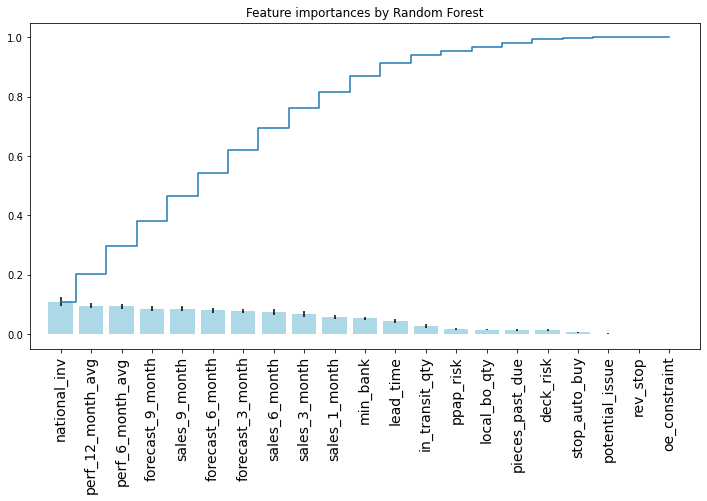

In [213]:
feat_names = boom.drop('went_on_backorder', axis=1).columns.values
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue', yerr=std[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

MaxDepth = 2.00  accuracy = 0.99   AUC = 0.9014
MaxDepth = 4.00  accuracy = 0.99   AUC = 0.9163
MaxDepth = 6.00  accuracy = 0.99   AUC = 0.9268
MaxDepth = 10.00  accuracy = 0.99   AUC = 0.9475


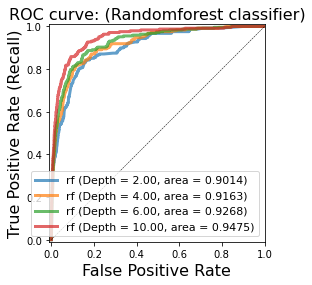

In [214]:
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [2, 4, 6, 10]:
    rf = RandomForestClassifier(max_depth=g,random_state=0).fit(X_train, y_train)
    y_score_rf = rf.predict_proba(X_test)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf[:,1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    accuracy_rf = rf.score(X_test, y_test)
    print("MaxDepth = {:.2f}  accuracy = {:.2f}   AUC = {:.4f}".format(g, accuracy_rf, 
                                                                    roc_auc_rf))
    plt.plot(fpr_rf, tpr_rf, lw=3, alpha=0.7, 
             label='rf (Depth = {:0.2f}, area = {:0.4f})'.format(g, roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (Randomforest classifier)', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()